In [1]:
import random
import numpy as np
from keras.utils import np_utils, to_categorical
from keras.preprocessing import image
from os import listdir
from os.path import isdir, join


def load_data(container_path='datasets', folders=['A', 'B', 'C'],
              size=2000, test_split=0.2, seed=0):
    
    #Loads sign language dataset.
    
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])

    return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)



#num_types = len(data['target_names'])
#targets = np_utils.to_categorical(np.array(data['target']), num_types)

Using TensorFlow backend.


In [2]:
train, test = load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test

In [4]:
imgs = x_train[:,:,:,:1]
imgs.shape

(1600, 50, 50, 1)

In [5]:
import matplotlib.pyplot as plt

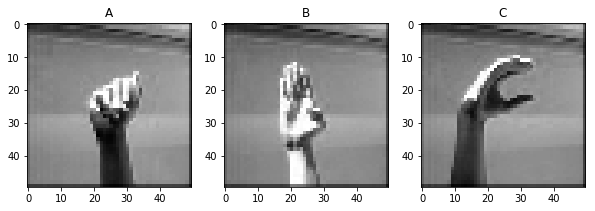

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title('A')
plt.imshow(imgs[1018].reshape((50,50)), cmap="gray")
plt.subplot(1,3,2)
plt.title('B')
plt.imshow(imgs[1003].reshape((50,50)), cmap="gray")
plt.subplot(1,3,3)
plt.title('C')
plt.imshow(imgs[1000].reshape((50,50)), cmap="gray")
plt.show()

2 0 2 0 2 0 1 0 0 1 1 1 0 1 1 2 2 0 0 1 

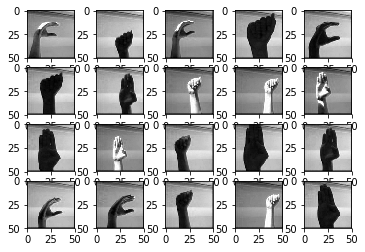

In [7]:
for i in range(20):
    print(y_train[i], end = ' ')
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(imgs[i].reshape((50,50)), cmap = 'gray')

In [8]:
num_B_train = np.count_nonzero(y_train == 1)
num_B_train

528

In [9]:
num_C_train = np.count_nonzero(y_train == 2)
num_C_train

532

In [10]:
num_B_test = np.count_nonzero(y_test == 1)
num_B_test

144

In [11]:
num_C_test = np.count_nonzero(y_test == 2)
num_C_test

138

In [12]:
y_train_OH = to_categorical(y_train)
y_train_OH

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [13]:
y_test_OH = to_categorical(y_test)
y_test_OH

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten , MaxPool2D

In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(32, (5,5), activation = 'relu', padding = 'same', input_shape = x_train.shape[1:]))
model.add(MaxPool2D(pool_size = (4,4)))
model.add(Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (4,4)))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [43]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
trainx , validx, trainy, validy = train_test_split(x_train, y_train_OH, test_size = 0.2, random_state = 24)

In [46]:
model.fit(trainx, trainy, batch_size = 32, epochs = 2, validation_data = (validx, validy))

Train on 1280 samples, validate on 320 samples
Epoch 1/2
1280/1280 [==============================] - 5s 4ms/step - loss: 0.6525 - accuracy: 0.7273 - val_loss: 0.2528 - val_accuracy: 0.9531
Epoch 2/2
1280/1280 [==============================] - 4s 3ms/step - loss: 0.1348 - accuracy: 0.9766 - val_loss: 0.0307 - val_accuracy: 0.9969


In [47]:
model.evaluate(x_test, y_test_OH)

400/400 [==============================] - 1s 1ms/step


[0.028010454177856445, 0.9975000023841858]

In [48]:
y_prob = model.predict(x_test)
y_prob.shape

(400, 3)

In [49]:
y_test.shape

(400,)

In [50]:
y_pred = np.argmax(y_prob, axis = 1)
y_pred

array([1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0,
       1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1,
       1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1,

In [51]:
y_test

array([1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0,
       1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1,
       1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1,

In [52]:
bad_test_idx = []
for i in range(len(y_test)):
    if y_pred[i] != y_test[i]:
        bad_test_idx.append(i)
bad_test_idx

[352]

In [27]:
model.save('saved_model.h5')

In [28]:
json = model.to_json()

In [29]:
with open('json_model.json', 'w') as json_file:
    json_file.write(json)


In [30]:
model.save_weights('weights.h5')

In [33]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[118,   0,   0],
       [  1, 143,   0],
       [  0,   0, 138]], dtype=int64)

In [35]:
import seaborn as sns

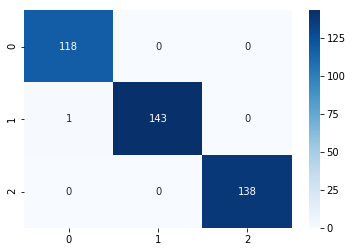

In [63]:
sns.heatmap(confusion, annot = True, fmt='', cmap='Blues')